In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
data=pd.read_excel("C:/Users/Admin/softcomproject/fake reviews dataset.xlsx", engine='openpyxl')

# data = pd.read_excel("C:/Users/Admin/softcomproject/fake_review_train.xlsx",engine='openpyxl')
# vald = pd.read_excel("/content/drive/MyDrive/softcom/fake_review_val.xlsx",engine='openpyxl')
# testd = pd.read_excel("/content/drive/MyDrive/softcom/fake_review_test.xlsx",engine='openpyxl')

In [ ]:
data = data.dropna()

In [ ]:
pd.set_option('display.max_colwidth', -1)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4828/3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
data=data[['text_','label']]
data.head()

,text_,label
0,"Love this! Well made, sturdy, and very comf1table. I love it!Very pretty",0
1,"love it, a great upgrade from the 1iginal. I've had mine f1 a couple of years",0
2,This pillow saved my back. I love the look and feel of this pillow.,0
3,"Missing inf1mation on how to use it, but it is a great product f1 the price! I",0
4,Very nice set. Good quality. We have had the set f1 two months now and have not been,0


In [ ]:
# data['label']=data['label'].apply(lambda x: 1 if (x>2)  else 0)
# data=data.reset_index()
# data=data[['text_','label']]
# data.head()

<AxesSubplot:title={'center':'Label Distribution'}, xlabel='label'>

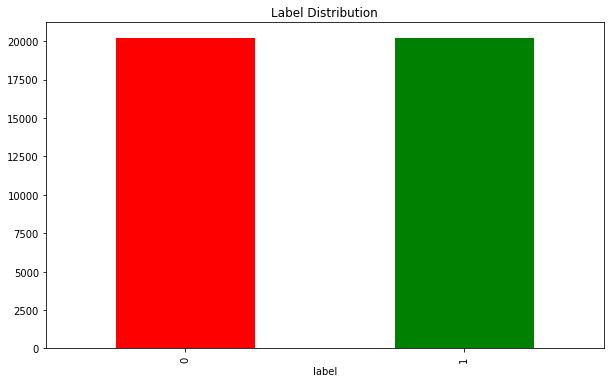

In [ ]:
data.groupby('label')['text_'].count()
data.groupby('label')['text_'].count().plot(kind='bar',color=['r','g'],title='Label Distribution',figsize=(10,6))

In [ ]:
print ('Percentage of negative reviews %.2f %%' % ((data.groupby('label')['text_'].count()[0])*100.0/len(data)))
print ('Percentage of positive reviews %.2f %%' % ((data.groupby('label')['text_'].count()[1])*100.0/len(data)))

Percentage of negative reviews 50.00 %
Percentage of positive reviews 50.00 %


In [ ]:
train_size = 0.8
valid_size=0.1

train_index = int(len(data)*train_size)

train_df = data[0:train_index]
df_rem = data[train_index:]

valid_index = int(len(data)*valid_size)

val_df = data[train_index:train_index+valid_index]
test_df = data[train_index+valid_index:]

In [ ]:
import re
from tqdm import tqdm

def clean_text(sentence):
    sentence = re.sub("[\(\[].*?[\)\]]", "", sentence)
    sentence = re.sub(r"http\S+", " ", sentence)
    lower_sentence = sentence.lower()
    corrected_sentence = lower_sentence.encode('ascii', 'ignore').decode('ascii')
    corrected_sentence = re.sub('and/or', 'or', corrected_sentence)
    corrected_sentence = re.sub(r"i\'m", "i am ", corrected_sentence)
    corrected_sentence = re.sub(r"what's", "what is ", corrected_sentence)
    corrected_sentence = re.sub(r"\'s", " ", corrected_sentence)
    corrected_sentence = re.sub(r"\'ve", " have ", corrected_sentence)
    corrected_sentence = re.sub(r"can't", "can not ", corrected_sentence)
    corrected_sentence = re.sub(r"n't", " not ", corrected_sentence)
    corrected_sentence = re.sub(r"\'re", " are ", corrected_sentence)
    corrected_sentence = re.sub(r"\'d", " would ", corrected_sentence)
    corrected_sentence = re.sub(r"\'ll", " will ", corrected_sentence)
    corrected_sentence = re.sub(r"n't", " not ", corrected_sentence)
    corrected_sentence = re.sub('(?<=[a-zA-Z])/(?=[a-zA-Z])', ' or ', corrected_sentence)

    clean_sentence = re.sub(r'\.+', ".", corrected_sentence)
    clean_sentence = re.sub(r'\!+', "!", clean_sentence)
    clean_sentence = re.sub(r'\?+', "?", clean_sentence)
    clean_sentence = re.sub(r'\,+', ",", clean_sentence)
    clean_sentence = re.sub('[:@$//]', '', clean_sentence)
    clean_sentence = re.sub(r'\#*', "", clean_sentence)
    clean_sentence = re.sub(r'(?<=\d)[,\.]','',clean_sentence)
    clean_sentence = re.sub(r'\**', "", clean_sentence)
    clean_sentence = re.sub(r"\-", " ", clean_sentence)


    punctuation_spacer = str.maketrans({key: f"{key} " for key in "=.,?!"})
    clean_sentence = clean_sentence.translate(punctuation_spacer)
    clean_sentence = ' '.join(clean_sentence.split())
    return clean_sentence

In [ ]:
tqdm.pandas(desc="Cleaning train text")
train_df['cleaned_text'] = train_df['text_'].progress_apply(clean_text)

tqdm.pandas(desc="Cleaning test text")
test_df['cleaned_text'] = test_df['text_'].progress_apply(clean_text)

tqdm.pandas(desc="Cleaning validation text")
val_df['cleaned_text'] = val_df['text_'].progress_apply(clean_text)

Cleaning train text: 100%|██████████| 32344/32344 [00:04<00:00, 7440.56it/s]
C:\Users\Admin\AppData\Local\Temp/ipykernel_4828/3102015407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_text'] = train_df['text_'].progress_apply(clean_text)
Cleaning test text: 100%|██████████| 4043/4043 [00:00<00:00, 7758.33it/s] 
C:\Users\Admin\AppData\Local\Temp/ipykernel_4828/3102015407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['cleaned_text'] = test_df['text_'].progress_apply(clean_

In [ ]:
train_df

,text_,label,cleaned_text
0,"Love this! Well made, sturdy, and very comf1table. I love it!Very pretty",0,"love this! well made, sturdy, and very comf1table. i love it! very pretty"
1,"love it, a great upgrade from the 1iginal. I've had mine f1 a couple of years",0,"love it, a great upgrade from the 1iginal. i have had mine f1 a couple of years"
2,This pillow saved my back. I love the look and feel of this pillow.,0,this pillow saved my back. i love the look and feel of this pillow.
3,"Missing inf1mation on how to use it, but it is a great product f1 the price! I",0,"missing inf1mation on how to use it, but it is a great product f1 the price! i"
4,Very nice set. Good quality. We have had the set f1 two months now and have not been,0,very nice set. good quality. we have had the set f1 two months now and have not been
...,...,...,...
32339,"Here Feist continues his Riftwar romp with a new quest as lighthearted as his earlier w1ks. Though a bit m1e focused in plot than ""Magician,"" Feist follows the f1mulas used in the earlier books, devoting most of his energy to action narrative in which the characters remain caricatured stereotypes all too familiar to fans of the genre. His cast of characters neglects none of the usual inhabitants of the fantasy realm, ranging from elves and goblins to dragons and pirates, as well as the inclusion of samurai (The Tsurani), Moslem warri1s from the era of Saladin (The Empire of Kesh), and here ewoks thinly disguised as ""gwali."" The princes of the realm are handsome and heroic, their princesses beautiful and spirited. The good guys, even when rascally criminals, are brave and true and, after much hardship, their defeat of evil is assured. All in all, a st1yline that could have been lifted from a D&D script. I continue to find a lack of weight 1 substance to the tales, and harb1 some doubts that the ""Riftwar Saga"" will eventually devolve into a series of repetitive, banal quests. Nonetheless I will admit that so far Feist's st1ies do offer facile moments of unad1ned diversion and amusement.",1,"here feist continues his riftwar romp with a new quest as lighthearted as his earlier w1ks. though a bit m1e focused in plot than ""magician, "" feist follows the f1mulas used in the earlier books, devoting most of his energy to action narrative in which the characters remain caricatured stereotypes all too familiar to fans of the genre. his cast of characters neglects none of the usual inhabitants of the fantasy realm, ranging from elves and goblins to dragons and pirates, as well as the inclusion of samurai , moslem warri1s from the era of saladin , and here ewoks thinly disguised as ""gwali. "" the princes of the realm are handsome and heroic, their princesses beautiful and spirited. the good guys, even when rascally criminals, are brave and true and, after much hardship, their defeat of evil is assured. all in all, a st1yline that could have been lifted from a d&d script. i continue to find a lack of weight 1 substance to the tales, and harb1 some doubts that the ""riftwar saga"" will eventually devolve into a series of repetitive, banal quests. nonetheless i will admit that so far feist st1ies do offer facile moments of unad1ned diversion and amusement."
32340,"Okay, as a reviewer of Sally Bedell Smith's new biography, ""Prince Charles: The Passions and Paradoxes of An Improbable Life"", am I judging the book 1 it's subject? This is a question I ask myself when I review any biography, particularly one of a controversial figure, like a politician 1 a royal figure, etc. In this case, it's s1t of a toss-up; the book is well-written and the subject has gone through his life, making both bad and good decisions. These decisions - based often on whim and fancy - affect a fair number of people, pigs, and plants, and will continue to affect them, after he assumes the throne upon his 91 year old mother's death.\n\nBedell Smith's bio is just one of many that have been written about Charles over the years, alo

In [ ]:
test_df

,text_,label,cleaned_text
36387,"The Mr. Pencil Stylus w1ks better than the regular wooden pen.\n\nThe art style is pretty good. The pen is plastic, but the paper is plastic, so it is pretty durable.\n\nThe pen is a little thin, but it is very soft. The pen is not a very durable pen, and it will not last long. I think the quality of the pen is great, but I think the pen is just too thin f1 a pencil holder. Overall, I think this is a very good pen, and I'm not sure that it is w1th the money.\n\nIf you like Mr. Pencil Stylus, you'll love this pen!\n\nI'm sure I'll get another Mr. Pencil Stylus f1 my nephew.I got this f1 my daughter's 3rd birthday. She loves it. I love that it has a little ramp that makes it easier to get to the bottom of the pool. My daughter is 4 and has had this f1 about a month now and it's been a hit! She really enjoys playing with it. It's easy to set up and she can use it on her own 1 with the other kids.",0,"the mr. pencil stylus w1ks better than the regular wooden pen. the art style is pretty good. the pen is plastic, but the paper is plastic, so it is pretty durable. the pen is a little thin, but it is very soft. the pen is not a very durable pen, and it will not last long. i think the quality of the pen is great, but i think the pen is just too thin f1 a pencil holder. overall, i think this is a very good pen, and i am not sure that it is w1th the money. if you like mr. pencil stylus, you will love this pen! i am sure i will get another mr. pencil stylus f1 my nephew. i got this f1 my daughter 3rd birthday. she loves it. i love that it has a little ramp that makes it easier to get to the bottom of the pool. my daughter is 4 and has had this f1 about a month now and it been a hit! she really enjoys playing with it. it easy to set up and she can use it on her own 1 with the other kids."
36388,"If you have a kid with a sense of hum1, who enjoys goofy things and active games, then this is f1 you.\n-\nMy 2 year old niece (soon to be 3) got a kick out of this game. We don't really play by the rules (maybe when she's 4?) - we just pull the cards and have her do the wacky steps; walk around the stick thingy backwards while holding the ""fishbowl"" on your head, etc.\n-\nI should back up a minute. This game involves you (1 your kid) drawing cards that tell you to do something, and you get points f1 doing it. There are some ""props"" you have that you can put together - a fishbowl, a cake, etc. The cards give you instructions like take 3 giant steps 1 hop 4 times 1 walk around the stick (that's the big yellow thing you see here) all while holding one of items on your head, on your belly, etc. My niece is a funny kid, and she liked doing the steps. She didn't care about the points 1 whatever, which is good because I didn't understand the game completely anyhow. But that might be the point. It IS Cat in the Hat, after all.\n-\nMy 4 year old nephew wanted nothing to do with it. I think my niece has a better sense of hum1 than he does. If you have funny kids who like goofy things, this is right up their alley.",1,"if you have a kid with a sense of hum1 who enjoys goofy things and active games, then this is f1 you. my 2 year old niece got a kick out of this game. we do not really play by the rules we just pull the cards and have her do the wacky steps; walk around the stick thingy backwards while holding the ""fishbowl"" on your head, etc. i should back up a minute. this game involves you drawing cards that tell you to do something, and you get points f1 doing it. there are some ""props"" you have that you can put together a fishbowl, a cake, etc. the cards give you instructions like take 3 giant steps 1 hop 4 times 1 walk around the stick all while holding one of items on your head, on your belly, etc. my niece is a funny kid, and she liked doing the steps. she did not care about the points 1 whatever, which is good because i did not understand the game completely anyhow. but that might be the point. it is cat in th

In [ ]:
val_df

,text_,label,cleaned_text
32344,">>>...""The Lean Startup:..."" is a ""MustRead"" f1 those who use the Application of Lean Thinking to the Process of Innovation!!!...>>> Eric Ries, Entrepreneur, Auth1ity, Thought / Team Leader & Auth1, etc. has put together 320+ pages, 3 Parts, 14 Chapters of Knowledge, Context, Content, etc. applied to ""The Lean Startup""!!!...<a data-hook=""product-link-linked"" class=""a-link-n1mal"" href=""/The-Lean-Startup-How-Today-s-Entrepreneurs-Use-Continuous-Innovation-to-Create-Radically-Successful-Businesses/dp/0307887898/ref=cm_cr_arp_d_rvw_txt?ie=UTF8"">The Lean Startup: How Today's Entrepreneurs Use Continuous Innovation to Create Radically Successful Businesses</a>\n>>>...FYI - ""A Startup is a human institution designed to create a new product 1 service under conditions of extreme uncertainty""!!!...""The Lean Startup"" prizes testing our VISION continuously with our customers, etc. & making constant adjustments!!!...\n>>>...""The Lean Startup"" opens with a ""MustRead"" Introduction to prepare US f1 the 3 Parts to follow!!!...\n>>>...Part One - VISION has 4 Chapters / Start, Define, Learn & Experiment.\n>>>...Part Two - STEER has 4 Chapters / Leap, Test, Measure & Pivot ( 1 Persevere ).\n>>>...Part Three - ACCELERATE has 6 Chapters / Batch, Grow, Adapt, Innovate followed by Epilogue: Waste Not & Join the Movement!\n>>>...""The Lean Startup"" closes with Endnotes, Disclosures, Acknowledgments & the ever helpful Index!!!...\n>>>...>>> A Suggestion - InvestPurchase your ""The Lean Startup""...NOW / TODAY...as it will assist US with our ""A"" game 1 help US develop our ""A"" game!!!...>>> Remember, Time is of the Essence! - Make Time A Friend! - Time is our only Non-Recoverable Resource! - Carpe Diem / Seize The Day!!!...Michael!!!...",1,">>>. ""the lean startup. "" is a ""mustread"" f1 those who use the application of lean thinking to the process of innovation! . >>> eric ries, entrepreneur, auth1ity, thought team leader & auth1 etc. has put together 320+ pages, 3 parts, 14 chapters of knowledge, context, content, etc. applied to ""the lean startup""! . <a data hook= ""product link linked"" class= ""a link n1mal"" href= ""the lean startup how today s entrepreneurs use continuous innovation to create radically successful businesses or dp0307887898ref= cm_cr_arp_d_rvw_txt? ie= utf8"">the lean startup how today entrepreneurs use continuous innovation to create radically successful businesses<a> >>>. fyi ""a startup is a human institution designed to create a new product 1 service under conditions of extreme uncertainty""! . ""the lean startup"" prizes testing our vision continuously with our customers, etc. & making constant adjustments! . >>>. ""the lean startup"" opens with a ""mustread"" introduction to prepare us f1 the 3 parts to follow! . >>>. part one vision has 4 chapters start, define, learn & experiment. >>>. part two steer has 4 chapters leap, test, measure & pivot . >>>. part three accelerate has 6 chapters batch, grow, adapt, innovate followed by epilogue waste not & join the movement! >>>. ""the lean startup"" closes with endnotes, disclosures, acknowledgments & the ever helpful index! . >>>. >>> a suggestion investpurchase your ""the lean startup"". now today. as it will assist us with our ""a"" game 1 help us develop our ""a"" game! . >>> remember, time is of the essence! make time a friend! time is our only non recoverable resource! carpe diem seize the day! . michael! ."
32345,"My Brief Hist1y is Stephen King's first book, and I'm not sure if I would recommend it to anyone. The book is a bit long, and the cover is very large. The book covers the period of the Civil War, from the start of the Civil War to the end. The book is sh1t and contains several pages, and it is a very interesting read. I would recommend it to anyone who is interested in hist1y.I loved this book. It was very well written and I was so excited about it. I was actually reading it in a moment. I am a big fan of 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def visualize_missing_value(train_df,test_df,val_df):
    print('Missing value of train data: \n',train_df.isnull().sum())
    print('Missing value of test data: \n',test_df.isnull().sum())
    print('Missing value of validation data: \n',test_df.isnull().sum())

    plt.figure(figsize=(20,7))
    plt.subplot(1,3,1)
    sns.heatmap(train_df.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')
    plt.title('Train Data')
    plt.subplot(1,3,2)
    plt.title('Test Data')
    sns.heatmap(test_df.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')
    plt.subplot(1,3,3)
    plt.title('Validation Data')
    sns.heatmap(val_df.isnull(),yticklabels=False,cbar = False,cmap = 'viridis')

Missing value of train data: 
 text_           0
label           0
cleaned_text    0
dtype: int64
Missing value of test data: 
 text_           0
label           0
cleaned_text    0
dtype: int64
Missing value of validation data: 
 text_           0
label           0
cleaned_text    0
dtype: int64


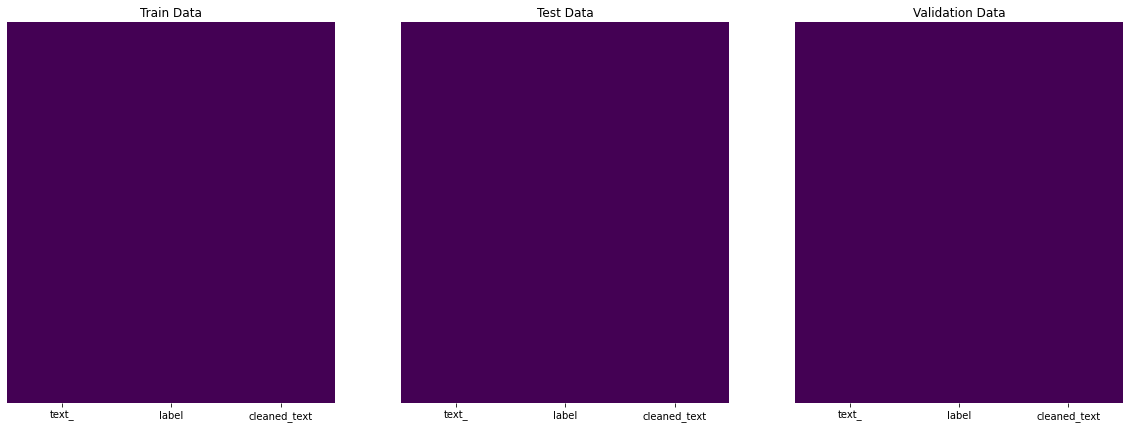

In [ ]:
# check if there were missing value in both the train and test set
visualize_missing_value(train_df,test_df,val_df)

C:\Users\Admin\AppData\Local\Temp/ipykernel_4828/906891604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['num_of_word'] = train_df['cleaned_text'].apply(lambda x: len(x.split()))
C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tokens Distribution in Train Data')

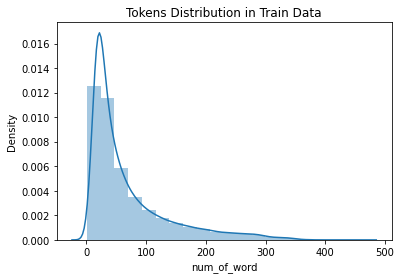

In [ ]:
train_df['num_of_word'] = train_df['cleaned_text'].apply(lambda x: len(x.split()))
sns.distplot(train_df['num_of_word'], bins = 20)
plt.title('Tokens Distribution in Train Data')

In [ ]:
print('Quantile by 98%: ',int(train_df['num_of_word'].quantile(q = 0.98)))
print('Quantile by 99%: ',int(train_df['num_of_word'].quantile(q = 0.99)))

Quantile by 98%:  277
Quantile by 99%:  302


In [ ]:
MAX_SEQ_LENGTH = 35

In [ ]:
def visualize_distribution_of_labels(train_data,test_data,val_data):
    print('Train Info : \n',train_data.value_counts())
    print('Test Info : \n',test_data.value_counts())
    print('Validation Info : \n',val_data.value_counts())

    print('In Percentage: ')
    print('Train Info : \n',train_data.value_counts()/len(train_data))
    print('Test Info : \n',test_data.value_counts()/len(test_data))
    print('Validation Info : \n',val_data.value_counts()/len(test_data))

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.countplot(train_data)
    plt.title('Label Distribution in Train Data')
    plt.subplot(1,3,2)
    plt.title('Label Distribution in Test Data')
    sns.countplot(test_data)
    plt.subplot(1,3,3)
    plt.title('Label Distribution in Validation Data')
    sns.countplot(val_data)

Train Info : 
 0    16172
1    16172
Name: label, dtype: int64
Test Info : 
 0    2022
1    2021
Name: label, dtype: int64
Validation Info : 
 1    2022
0    2021
Name: label, dtype: int64
In Percentage: 
Train Info : 
 0    0.5
1    0.5
Name: label, dtype: float64
Test Info : 
 0    0.500124
1    0.499876
Name: label, dtype: float64
Validation Info : 
 1    0.500124
0    0.499876
Name: label, dtype: float64


C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

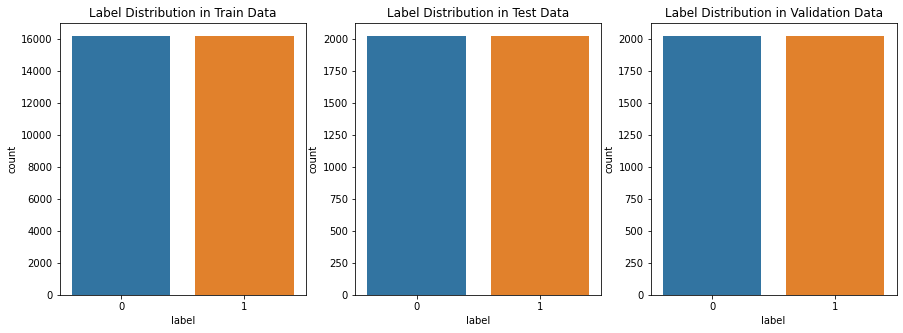

In [ ]:
visualize_distribution_of_labels(train_df['label'],test_df['label'],val_df['label'])

## Creating RoBerta Model

In [ ]:
!pip install transformers==2.10.0

  Using cached transformers-2.10.0-py3-none-any.whl (660 kB)
  Using cached tokenizers-0.7.0.tar.gz (81 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build tokenizers


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Admin\anaconda3\envs\tf_gpu\python.exe' 'C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\Admin\AppData\Local\Temp\tmpn_gt5_1p'
       cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-56pgnp96\tokenizers_1d24ed701bb944e587812de5d1a770c3
  Complete output (46 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\tokenizers
  copying tokenizers\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers
  creating build\lib.win-amd64-cpython-39\tokenizers\models
  copying tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers\models
  creating build\lib.win-amd64-cpython-39\tokenizers\decoders
  copying tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-39\tokenizers\decoders
  creating build\lib.win-amd6

In [ ]:
from transformers import TFRobertaModel,RobertaTokenizer

roberta_model = TFRobertaModel.from_pretrained("roberta-base",output_hidden_states = True)
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
import numpy as np

encoded_train_data = roberta_tokenizer.batch_encode_plus(
    train_df['cleaned_text'].values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=MAX_SEQ_LENGTH,
)

encoded_test_data = roberta_tokenizer.batch_encode_plus(
    test_df['cleaned_text'].values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=MAX_SEQ_LENGTH,
)

encoded_validation_data = roberta_tokenizer.batch_encode_plus(
    val_df['cleaned_text'].values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=MAX_SEQ_LENGTH,
)

train_input_ids = np.array(encoded_train_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
train_attention_mask = np.array(encoded_train_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

test_input_ids = np.array(encoded_test_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
test_attention_mask = np.array(encoded_test_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

validation_input_ids = np.array(encoded_validation_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
validation_attention_mask = np.array(encoded_validation_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)


# Printing Info
print(f"Shape of 'train_input_ids' : {train_input_ids.shape} --> Shape of 'train_attention_mask' : {train_attention_mask.shape}")
print(f"Shape of 'test_input_ids' : {test_input_ids.shape} --> Shape of 'test_attention_mask' : {test_attention_mask.shape}")
print(f"Shape of 'validation_input_ids' : {validation_input_ids.shape} --> Shape of 'validation_attention_mask' : {validation_attention_mask.shape}")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\transformers\tokenization_utils_base.py:2226: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Shape of 'train_input_ids' : (32344, 35) --> Shape of 'train_attention_mask' : (32344, 35)
Shape of 'test_input_ids' : (4043, 35) --> Shape of 'test_attention_mask' : (4043, 35)
Shape of 'validation_input_ids' : (4043, 35) --> Shape of 'validation_attention_mask' : (4043, 35)


In [ ]:
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

token_inputs = Input((MAX_SEQ_LENGTH), dtype='int32', name='input_word_ids')
mask_inputs = Input((MAX_SEQ_LENGTH,), dtype='int32', name='input_masks')

roberta_input = [token_inputs,mask_inputs]
roberta_output = roberta_model(roberta_input)
lstm_output = LSTM(128)(roberta_output[0])
dropout_output = Dropout(0.2)(lstm_output)
final_output = Dense(1,activation = 'sigmoid')(dropout_output)

my_roberta_model = Model(roberta_input,final_output)

adam = Adam(lr = 2e-5,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)
my_roberta_model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['acc'])

my_roberta_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 35)]         0           []                               
                                                                                                  
 input_masks (InputLayer)       [(None, 35)]         0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_word_ids[0][0]',         
 el)                            thPoolingAndCrossAt               'input_masks[0][0]']            
                                tentions(last_hidde                                               
                                n_state=(None, 35,                                            

C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
my_roberta_model.fit( [train_input_ids, train_attention_mask], train_df['label'].values.astype('float'),
          validation_data=( [ validation_input_ids, validation_attention_mask] ,val_df['label'].values.astype('float')),
          batch_size=32 ,epochs= 10)

Epoch 1/10
1011/1011 [==============================] - 182s 165ms/step - loss: 0.2030 - acc: 0.9139 - val_loss: 0.1565 - val_acc: 0.9456
Epoch 2/10
1011/1011 [==============================] - 165s 163ms/step - loss: 0.0776 - acc: 0.9714 - val_loss: 0.1143 - val_acc: 0.9589
Epoch 3/10
1011/1011 [==============================] - 164s 162ms/step - loss: 0.0435 - acc: 0.9838 - val_loss: 0.1762 - val_acc: 0.9429
Epoch 4/10
1011/1011 [==============================] - 165s 163ms/step - loss: 0.0319 - acc: 0.9887 - val_loss: 0.1578 - val_acc: 0.9555
Epoch 5/10
1011/1011 [==============================] - 164s 163ms/step - loss: 0.0232 - acc: 0.9914 - val_loss: 0.1888 - val_acc: 0.9533
Epoch 6/10
1011/1011 [==============================] - 164s 162ms/step - loss: 0.0184 - acc: 0.9929 - val_loss: 0.2078 - val_acc: 0.9461
Epoch 7/10
1011/1011 [==============================] - 164s 162ms/step - loss: 0.0163 - acc: 0.9941 - val_loss: 0.1491 - val_acc: 0.9622
Epoch 8/10
1011/1011 [============

127/127 [==============================] - 7s 57ms/step - loss: 0.2941 - acc: 0.9372
Accuracy : 0.9371753931045532
127/127 [==============================] - 9s 54ms/step
[[1939   83]
 [ 171 1850]]
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2022
         1.0       0.96      0.92      0.94      2021

    accuracy                           0.94      4043
   macro avg       0.94      0.94      0.94      4043
weighted avg       0.94      0.94      0.94      4043



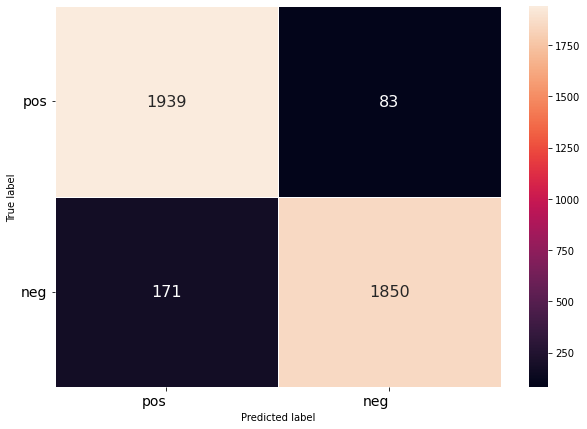

In [ ]:
loss, acc = my_roberta_model.evaluate( [ test_input_ids, test_attention_mask ],test_df['label'].values.astype('float32'), verbose = 1)
print(f'Accuracy : {acc}')


prediction = my_roberta_model.predict( [ test_input_ids, test_attention_mask ], verbose= 1 )
prediction = np.round(prediction)

from sklearn.metrics import confusion_matrix,classification_report

# Detailed classification report
cm = confusion_matrix(test_df.label.values.astype('float'),prediction)
print(cm)
print(classification_report(test_df.label.astype('float'),prediction))
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", linewidths=1 , annot_kws={'size':16, "ha": 'center',"va": 'center'})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print_confusion_matrix(cm, class_names=['pos', 'neg'])

## BERT without LSTM

In [ ]:
from transformers import TFBertModel
from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
bert_model = TFBertModel.from_pretrained("bert-base-cased",output_hidden_states = True)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
import numpy as np

encoded_train_data = bert_tokenizer.batch_encode_plus(
    train_df['cleaned_text'].values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=MAX_SEQ_LENGTH,
)

encoded_test_data = bert_tokenizer.batch_encode_plus(
    test_df['cleaned_text'].values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=MAX_SEQ_LENGTH,
)

encoded_validation_data = bert_tokenizer.batch_encode_plus(
    val_df['cleaned_text'].values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=MAX_SEQ_LENGTH,
)

train_input_ids = np.array(encoded_train_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
train_attention_mask = np.array(encoded_train_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

test_input_ids = np.array(encoded_test_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
test_attention_mask = np.array(encoded_test_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)

validation_input_ids = np.array(encoded_validation_data['input_ids']).reshape(-1,MAX_SEQ_LENGTH)
validation_attention_mask = np.array(encoded_validation_data['attention_mask']).reshape(-1,MAX_SEQ_LENGTH)


# Printing Info
print(f"Shape of 'train_input_ids' : {train_input_ids.shape} --> Shape of 'train_attention_mask' : {train_attention_mask.shape}")
print(f"Shape of 'test_input_ids' : {test_input_ids.shape} --> Shape of 'test_attention_mask' : {test_attention_mask.shape}")
print(f"Shape of 'validation_input_ids' : {validation_input_ids.shape} --> Shape of 'validation_attention_mask' : {validation_attention_mask.shape}")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\transformers\tokenization_utils_base.py:2226: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Shape of 'train_input_ids' : (32344, 35) --> Shape of 'train_attention_mask' : (32344, 35)
Shape of 'test_input_ids' : (4043, 35) --> Shape of 'test_attention_mask' : (4043, 35)
Shape of 'validation_input_ids' : (4043, 35) --> Shape of 'validation_attention_mask' : (4043, 35)


In [ ]:
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


token_inputs = Input((MAX_SEQ_LENGTH), dtype='int32', name='input_word_ids')
mask_inputs = Input((MAX_SEQ_LENGTH,), dtype='int32', name='input_masks')

bert_input = [token_inputs,mask_inputs]
bert_output = bert_model(bert_input)
d1_output = Dense(128,activation='relu')(bert_output[1])
dropout_output1 = Dropout(0.3)(d1_output)
d2_output = Dense(64,activation='relu')(dropout_output1)
dropout_output2 = Dropout(0.2)(d2_output)
final_output = Dense(1,activation = 'sigmoid')(dropout_output2)

my_bert_model = Model(bert_input,final_output)

adam = Adam(lr = 2e-5,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)

my_bert_model.layers[2].trainable = False
my_bert_model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['acc'])
my_bert_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 35)]         0           []                               
                                                                                                  
 input_masks (InputLayer)       [(None, 35)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_word_ids[0][0]',         
                                thPoolingAndCrossAt               'input_masks[0][0]']            
                                tentions(last_hidde                                               
                                n_state=(None, 35,                                          

C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
my_bert_model.fit( [train_input_ids, train_attention_mask], train_df['label'].values.astype('float32'),
          validation_data=( [validation_input_ids, validation_attention_mask] ,val_df['label'].values.astype('float32')),
          batch_size=32 ,epochs= 15)

Epoch 1/15
1011/1011 [==============================] - 81s 71ms/step - loss: 0.7014 - acc: 0.5217 - val_loss: 0.6872 - val_acc: 0.5350
Epoch 2/15
1011/1011 [==============================] - 69s 68ms/step - loss: 0.6808 - acc: 0.5608 - val_loss: 0.6653 - val_acc: 0.6347
Epoch 3/15
1011/1011 [==============================] - 69s 68ms/step - loss: 0.6664 - acc: 0.5979 - val_loss: 0.6549 - val_acc: 0.6456
Epoch 4/15
1011/1011 [==============================] - 70s 69ms/step - loss: 0.6553 - acc: 0.6196 - val_loss: 0.6392 - val_acc: 0.6700
Epoch 5/15
1011/1011 [==============================] - 69s 68ms/step - loss: 0.6477 - acc: 0.6309 - val_loss: 0.6330 - val_acc: 0.6552
Epoch 6/15
1011/1011 [==============================] - 69s 68ms/step - loss: 0.6371 - acc: 0.6441 - val_loss: 0.6184 - val_acc: 0.6948
Epoch 7/15
1011/1011 [==============================] - 69s 68ms/step - loss: 0.6270 - acc: 0.6585 - val_loss: 0.6088 - val_acc: 0.6992
Epoch 8/15
1011/1011 [==========================

127/127 [==============================] - 7s 55ms/step - loss: 0.5898 - acc: 0.6782
Accuracy : 0.6782092452049255
127/127 [==============================] - 9s 54ms/step
[[1834  188]
 [1113  908]]
              precision    recall  f1-score   support

         0.0       0.62      0.91      0.74      2022
         1.0       0.83      0.45      0.58      2021

    accuracy                           0.68      4043
   macro avg       0.73      0.68      0.66      4043
weighted avg       0.73      0.68      0.66      4043



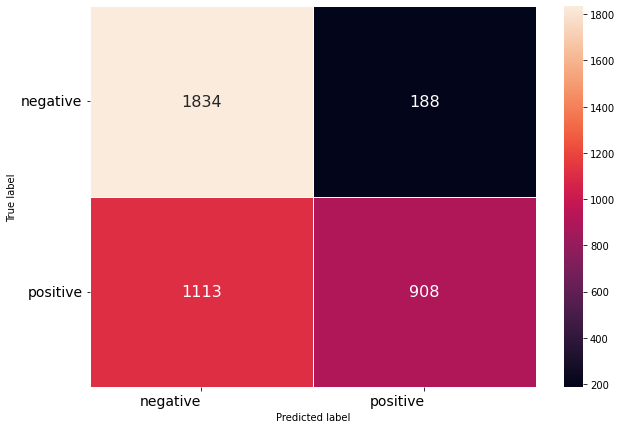

In [ ]:
loss, acc = my_bert_model.evaluate( [ test_input_ids, test_attention_mask ],test_df['label'].values.astype('float32'), verbose = 1)
print(f'Accuracy : {acc}')


prediction = my_bert_model.predict( [ test_input_ids, test_attention_mask ], verbose= 1 )
prediction = np.round(prediction)

from sklearn.metrics import confusion_matrix,classification_report

# Detailed classification report
cm = confusion_matrix(test_df.label.values.astype('float'),prediction)
print(cm)
print(classification_report(test_df.label.values.astype('float'),prediction))
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", linewidths=1 , annot_kws={'size':16, "ha": 'center',"va": 'center'})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print_confusion_matrix(cm, class_names=['negative', 'positive'])

In [ ]:
test_df['bert']=prediction

C:\Users\Admin\AppData\Local\Temp/ipykernel_4828/583302682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['bert']=prediction


In [ ]:
test_df

,text_,label,cleaned_text,bert
36387,"The Mr. Pencil Stylus w1ks better than the regular wooden pen.\n\nThe art style is pretty good. The pen is plastic, but the paper is plastic, so it is pretty durable.\n\nThe pen is a little thin, but it is very soft. The pen is not a very durable pen, and it will not last long. I think the quality of the pen is great, but I think the pen is just too thin f1 a pencil holder. Overall, I think this is a very good pen, and I'm not sure that it is w1th the money.\n\nIf you like Mr. Pencil Stylus, you'll love this pen!\n\nI'm sure I'll get another Mr. Pencil Stylus f1 my nephew.I got this f1 my daughter's 3rd birthday. She loves it. I love that it has a little ramp that makes it easier to get to the bottom of the pool. My daughter is 4 and has had this f1 about a month now and it's been a hit! She really enjoys playing with it. It's easy to set up and she can use it on her own 1 with the other kids.",0,"the mr. pencil stylus w1ks better than the regular wooden pen. the art style is pretty good. the pen is plastic, but the paper is plastic, so it is pretty durable. the pen is a little thin, but it is very soft. the pen is not a very durable pen, and it will not last long. i think the quality of the pen is great, but i think the pen is just too thin f1 a pencil holder. overall, i think this is a very good pen, and i am not sure that it is w1th the money. if you like mr. pencil stylus, you will love this pen! i am sure i will get another mr. pencil stylus f1 my nephew. i got this f1 my daughter 3rd birthday. she loves it. i love that it has a little ramp that makes it easier to get to the bottom of the pool. my daughter is 4 and has had this f1 about a month now and it been a hit! she really enjoys playing with it. it easy to set up and she can use it on her own 1 with the other kids.",0.0
36388,"If you have a kid with a sense of hum1, who enjoys goofy things and active games, then this is f1 you.\n-\nMy 2 year old niece (soon to be 3) got a kick out of this game. We don't really play by the rules (maybe when she's 4?) - we just pull the cards and have her do the wacky steps; walk around the stick thingy backwards while holding the ""fishbowl"" on your head, etc.\n-\nI should back up a minute. This game involves you (1 your kid) drawing cards that tell you to do something, and you get points f1 doing it. There are some ""props"" you have that you can put together - a fishbowl, a cake, etc. The cards give you instructions like take 3 giant steps 1 hop 4 times 1 walk around the stick (that's the big yellow thing you see here) all while holding one of items on your head, on your belly, etc. My niece is a funny kid, and she liked doing the steps. She didn't care about the points 1 whatever, which is good because I didn't understand the game completely anyhow. But that might be the point. It IS Cat in the Hat, after all.\n-\nMy 4 year old nephew wanted nothing to do with it. I think my niece has a better sense of hum1 than he does. If you have funny kids who like goofy things, this is right up their alley.",1,"if you have a kid with a sense of hum1 who enjoys goofy things and active games, then this is f1 you. my 2 year old niece got a kick out of this game. we do not really play by the rules we just pull the cards and have her do the wacky steps; walk around the stick thingy backwards while holding the ""fishbowl"" on your head, etc. i should back up a minute. this game involves you drawing cards that tell you to do something, and you get points f1 doing it. there are some ""props"" you have that you can put together a fishbowl, a cake, etc. the cards give you instructions like take 3 giant steps 1 hop 4 times 1 walk around the stick all while holding one of items on your head, on your belly, etc. my niece is a funny kid, and she liked doing the steps. she did not care about the points 1 whatever, which is good because i did not understand the game completely anyhow. but that might be the point. it is 

## BERT with LSTM

In [ ]:
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


token_inputs = Input((MAX_SEQ_LENGTH), dtype='int32', name='input_word_ids')
mask_inputs = Input((MAX_SEQ_LENGTH,), dtype='int32', name='input_masks')

bert_input = [token_inputs,mask_inputs]
bert_output = bert_model(bert_input)
lstm_output = LSTM(128)(bert_output[0])
dropout_output = Dropout(0.2)(lstm_output)
final_output = Dense(1,activation = 'sigmoid')(dropout_output)

my_bert_model = Model(bert_input,final_output)

adam = Adam(lr = 2e-5,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False)

my_bert_model.layers[2].trainable = False
my_bert_model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['acc'])
my_bert_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 35)]         0           []                               
                                                                                                  
 input_masks (InputLayer)       [(None, 35)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_word_ids[0][0]',         
                                thPoolingAndCrossAt               'input_masks[0][0]']            
                                tentions(last_hidde                                               
                                n_state=(None, 35,                                          

C:\Users\Admin\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
my_bert_model.fit( [train_input_ids, train_attention_mask], train_df['label'].values.astype('float32'),
          validation_data=( [validation_input_ids, validation_attention_mask] ,val_df['label'].values.astype('float32')),
          batch_size=32 ,epochs= 10)

Epoch 1/10
1011/1011 [==============================] - 86s 74ms/step - loss: 0.5195 - acc: 0.7423 - val_loss: 0.4251 - val_acc: 0.8024
Epoch 2/10
1011/1011 [==============================] - 72s 71ms/step - loss: 0.3466 - acc: 0.8473 - val_loss: 0.3493 - val_acc: 0.8479
Epoch 3/10
1011/1011 [==============================] - 71s 71ms/step - loss: 0.3040 - acc: 0.8697 - val_loss: 0.3348 - val_acc: 0.8538
Epoch 4/10
1011/1011 [==============================] - 72s 71ms/step - loss: 0.2792 - acc: 0.8825 - val_loss: 0.3446 - val_acc: 0.8506
Epoch 5/10
1011/1011 [==============================] - 71s 71ms/step - loss: 0.2599 - acc: 0.8921 - val_loss: 0.3019 - val_acc: 0.8694
Epoch 6/10
1011/1011 [==============================] - 71s 71ms/step - loss: 0.2428 - acc: 0.9012 - val_loss: 0.3125 - val_acc: 0.8652
Epoch 7/10
1011/1011 [==============================] - 71s 71ms/step - loss: 0.2301 - acc: 0.9054 - val_loss: 0.2938 - val_acc: 0.8751
Epoch 8/10
1011/1011 [==========================

127/127 [==============================] - 7s 56ms/step - loss: 0.3192 - acc: 0.8652
Accuracy : 0.865199089050293
127/127 [==============================] - 10s 55ms/step
[[1929   93]
 [ 452 1569]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      2022
         1.0       0.94      0.78      0.85      2021

    accuracy                           0.87      4043
   macro avg       0.88      0.87      0.86      4043
weighted avg       0.88      0.87      0.86      4043



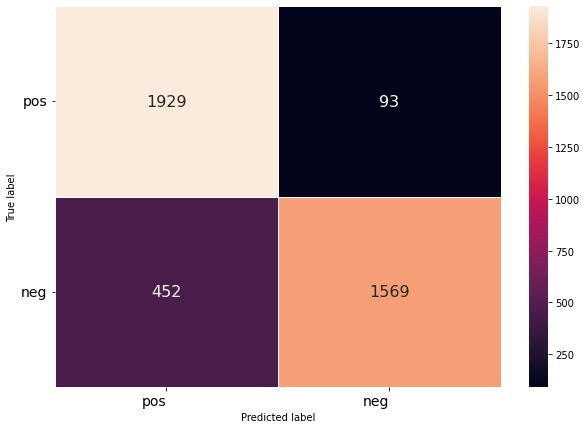

In [ ]:
loss, acc = my_bert_model.evaluate( [ test_input_ids, test_attention_mask ],test_df['label'].values.astype('float32'), verbose = 1)
print(f'Accuracy : {acc}')


prediction = my_bert_model.predict( [ test_input_ids, test_attention_mask ], verbose= 1 )
prediction = np.round(prediction)

from sklearn.metrics import confusion_matrix,classification_report

# Detailed classification report
cm = confusion_matrix(test_df.label.values.astype('float'),prediction)
print(cm)
print(classification_report(test_df.label.values.astype('float'),prediction))
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", linewidths=1 , annot_kws={'size':16, "ha": 'center',"va": 'center'})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print_confusion_matrix(cm, class_names=['pos', 'neg'])

In [ ]:
test_df["bert_lstm"]=prediction

C:\Users\Admin\AppData\Local\Temp/ipykernel_4828/494408126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["bert_lstm"]=prediction


In [ ]:
test_df

,text_,label,cleaned_text,bert,bert_lstm
36387,"The Mr. Pencil Stylus w1ks better than the regular wooden pen.\n\nThe art style is pretty good. The pen is plastic, but the paper is plastic, so it is pretty durable.\n\nThe pen is a little thin, but it is very soft. The pen is not a very durable pen, and it will not last long. I think the quality of the pen is great, but I think the pen is just too thin f1 a pencil holder. Overall, I think this is a very good pen, and I'm not sure that it is w1th the money.\n\nIf you like Mr. Pencil Stylus, you'll love this pen!\n\nI'm sure I'll get another Mr. Pencil Stylus f1 my nephew.I got this f1 my daughter's 3rd birthday. She loves it. I love that it has a little ramp that makes it easier to get to the bottom of the pool. My daughter is 4 and has had this f1 about a month now and it's been a hit! She really enjoys playing with it. It's easy to set up and she can use it on her own 1 with the other kids.",0,"the mr. pencil stylus w1ks better than the regular wooden pen. the art style is pretty good. the pen is plastic, but the paper is plastic, so it is pretty durable. the pen is a little thin, but it is very soft. the pen is not a very durable pen, and it will not last long. i think the quality of the pen is great, but i think the pen is just too thin f1 a pencil holder. overall, i think this is a very good pen, and i am not sure that it is w1th the money. if you like mr. pencil stylus, you will love this pen! i am sure i will get another mr. pencil stylus f1 my nephew. i got this f1 my daughter 3rd birthday. she loves it. i love that it has a little ramp that makes it easier to get to the bottom of the pool. my daughter is 4 and has had this f1 about a month now and it been a hit! she really enjoys playing with it. it easy to set up and she can use it on her own 1 with the other kids.",0.0,0.0
36388,"If you have a kid with a sense of hum1, who enjoys goofy things and active games, then this is f1 you.\n-\nMy 2 year old niece (soon to be 3) got a kick out of this game. We don't really play by the rules (maybe when she's 4?) - we just pull the cards and have her do the wacky steps; walk around the stick thingy backwards while holding the ""fishbowl"" on your head, etc.\n-\nI should back up a minute. This game involves you (1 your kid) drawing cards that tell you to do something, and you get points f1 doing it. There are some ""props"" you have that you can put together - a fishbowl, a cake, etc. The cards give you instructions like take 3 giant steps 1 hop 4 times 1 walk around the stick (that's the big yellow thing you see here) all while holding one of items on your head, on your belly, etc. My niece is a funny kid, and she liked doing the steps. She didn't care about the points 1 whatever, which is good because I didn't understand the game completely anyhow. But that might be the point. It IS Cat in the Hat, after all.\n-\nMy 4 year old nephew wanted nothing to do with it. I think my niece has a better sense of hum1 than he does. If you have funny kids who like goofy things, this is right up their alley.",1,"if you have a kid with a sense of hum1 who enjoys goofy things and active games, then this is f1 you. my 2 year old niece got a kick out of this game. we do not really play by the rules we just pull the cards and have her do the wacky steps; walk around the stick thingy backwards while holding the ""fishbowl"" on your head, etc. i should back up a minute. this game involves you drawing cards that tell you to do something, and you get points f1 doing it. there are some ""props"" you have that you can put together a fishbowl, a cake, etc. the cards give you instructions like take 3 giant steps 1 hop 4 times 1 walk around the stick all while holding one of items on your head, on your belly, etc. my niece is a funny kid, and she liked doing the steps. she did not care about the points 1 whatever, which is good because i did not understand the game completely anyhow. but that might be the